# Deep Learning 101

This notebook presents the basics concepts that involve the concept of Deep Learning.

1. Linear Regression
* Logistic Regression
* **Artificial Neural Networks**
* Deep Neural Networks
* Convolutional Neural Networks

## 3. Artificial Neural Networks

These models are called *feedforward* because information **flows** through the function being evaluated from $x$, through the intermediate computations used to define $f$, and finally to the output $y$.

*Feedforward* neural networks are called networks because they are typically represented by composing together many different functions.

$$
    \begin{align}
    \hat{y} &= f(x) \\
            &= f^{(2)}(f^{(1)}(x))
    \end{align}
$$

$$f^{(i)}(h) = \sigma_i(W_ih + b_i)$$


$$\hat{y} = \sigma_2(W_2 \sigma_1(W_1 x + b_1) + b_2)$$
---

## Artificial Neural Networks with Keras and TensorFlow

**Activations functions** are non-linear functions applied when passing the output of a layer to the next layer or the final

| **Keras**      | **Example**                                                         | **Link**                 |
| -------------- |:------------------------------------------------------------------: | :-----------------------:|
| **Activation functions**| sigmoid, step, tanh, softmax, ReLU | [keras.io/activations/](https://keras.io/activations/)|

---

## 1. Load data

#### Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model, to_categorical

#### Getting the data

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Explore visual data

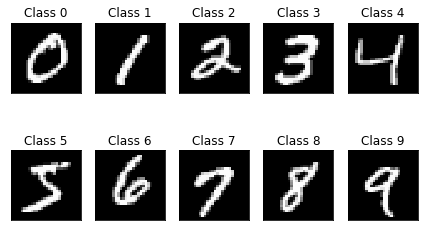

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [5]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_train.shape (10000,)


#### Reshaping and normalizing the inputs

In [6]:
# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# normalizing the inputs
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)

X_train reshape: (60000, 784)
X_test reshape: (10000, 784)


#### Convert class vectors to binary class matrices

In [7]:
# 10 classes
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)

y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## 2. Define model

#### Add the input-, hidden- and output-layers

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()

# Add the input layer and hidden layer 1
model.add(Dense(32, input_shape=(784,), activation='sigmoid'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

2021-08-08 20:22:18.077419: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Model visualization

In [9]:
# plot a Keras model
plot_model(model, to_file='img/model03_ann.png',
           show_shapes=True, show_layer_names=True)

# prints a summary representation of your model
model.summary()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


![Artificial neural network](img/model03_ann.png)

## 3. Compile model

In [10]:
# compiling the sequential model
model.compile('rmsprop', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

## 4. Fit model

In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train_cat,
                    batch_size=256, epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test_cat))

2021-08-08 20:22:18.239332: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-08 20:22:18.257943: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/50
235/235 - 1s - loss: 1.1466 - categorical_accuracy: 0.7612 - val_loss: 0.6066 - val_categorical_accuracy: 0.8823
Epoch 2/50
235/235 - 0s - loss: 0.4703 - categorical_accuracy: 0.8931 - val_loss: 0.3661 - val_categorical_accuracy: 0.9092
Epoch 3/50
235/235 - 0s - loss: 0.3327 - categorical_accuracy: 0.9122 - val_loss: 0.2948 - val_categorical_accuracy: 0.9195
Epoch 4/50
235/235 - 0s - loss: 0.2804 - categorical_accuracy: 0.9229 - val_loss: 0.2610 - val_categorical_accuracy: 0.9287
Epoch 5/50
235/235 - 0s - loss: 0.2507 - categorical_accuracy: 0.9301 - val_loss: 0.2393 - val_categorical_accuracy: 0.9321
Epoch 6/50
235/235 - 0s - loss: 0.2301 - categorical_accuracy: 0.9359 - val_loss: 0.2220 - val_categorical_accuracy: 0.9363
Epoch 7/50
235/235 - 0s - loss: 0.2136 - categorical_accuracy: 0.9400 - val_loss: 0.2093 - val_categorical_accuracy: 0.9393
Epoch 8/50
235/235 - 0s - loss: 0.2004 - categorical_accuracy: 0.9432 - val_loss: 0.1989 - val_categorical_accuracy: 0.9414
Epoch 9/

## 5. Evaluate model

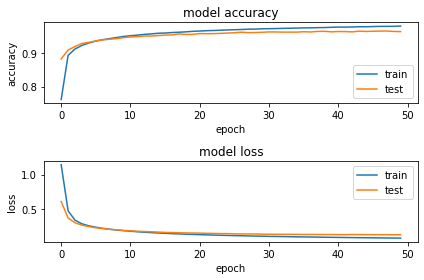

In [12]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [13]:
# evaluate model on test data
[test_loss, test_acc] = model.evaluate(X_test, y_test_cat)
print("Evaluation result on Test Data:\nLoss = {}\nAccuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 512us/step - loss: 0.1202 - categorical_accuracy: 0.9641
Evaluation result on Test Data:
Loss = 0.12018612027168274
Accuracy = 0.9641000032424927


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)